# App to do random DALL-E-2 Generation

In [ ]:
# Set up the API Keys and such
import os 
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')
SERPAPI_API_KEY = os.getenv('SERPAPI_API_KEY')
PINECONE_API_KEY = os.getenv('PINECONE_API_KEY')
PINECONE_API_KEY = os.getenv('PINECONE_API_KEY')
HNSWLIB_NO_NATIVE = os.getenv('PINECONE_API_KEY')

In [ ]:
import openai
import pandas as pd
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

In [ ]:
# Didn't wind up using this, but leaving for now
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, 
    )
    return response.choices[0].message["content"]

In [ ]:
def generate_image(random_words):
    # Use the DALL-E API to create a single image from the random words
    image_response = openai.Image.create(
    prompt=random_words,
    n=1,
    size="512x512",
)
    url = image_response['data'][0]['url']
    return url

In [ ]:
def display_image(url):
    # Display the image from the url

    # Use requests to get the image data
    image = requests.get(url)

    # Check if the request was successful
    if image.status_code == 200:
        # Get the content of the response
        img_data = image.content
    
        # Create a PIL image from the byte data
        img = Image.open(BytesIO(img_data))
    
        # Display the image
        display(img)
    else:
        print(f'Unable to retrieve the image. HTTP status code: {response.status_code}')

    

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised APIConnectionError: Error communicating with OpenAI: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')).



Crossbow lemur severity


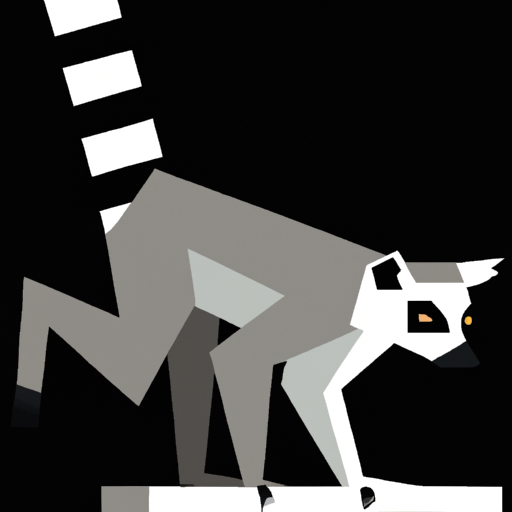


    birthday bicycle custard


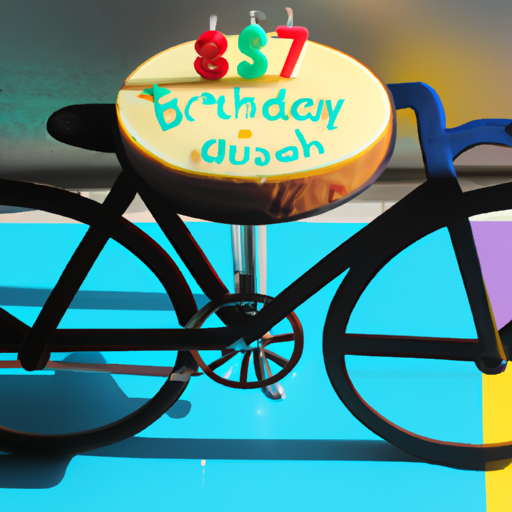


Leatherback, Graffiti, Spider


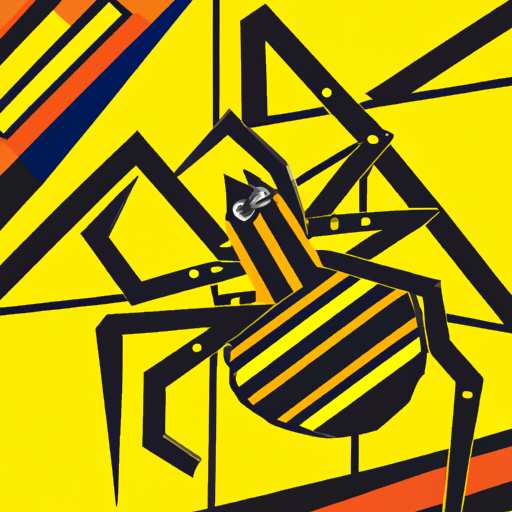


    munchkin juniper violin


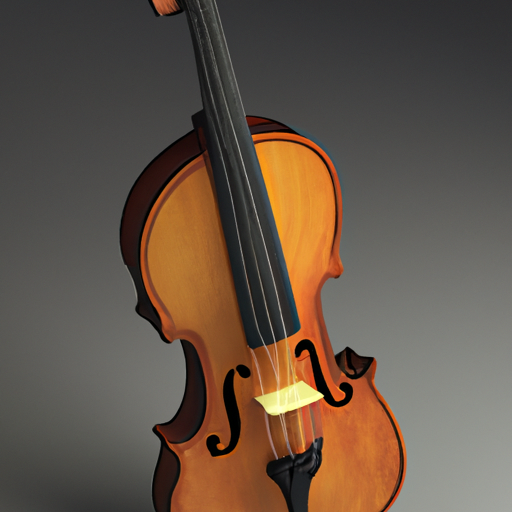


Bovine, craze, floss


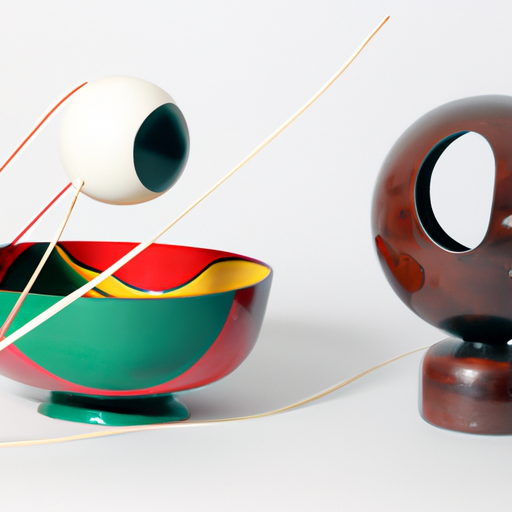


Canyon Lambda Mosaic


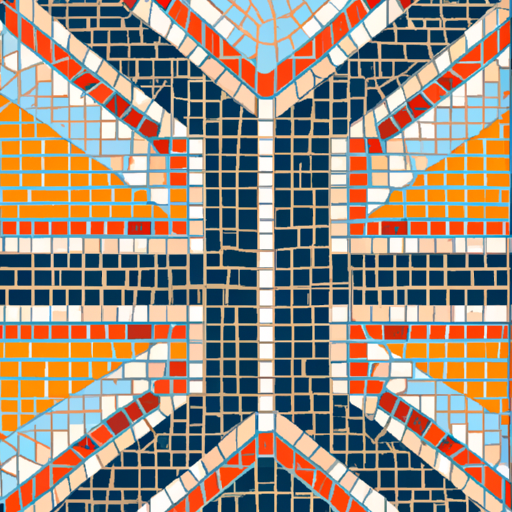


    oceanic bulwark chrysalis


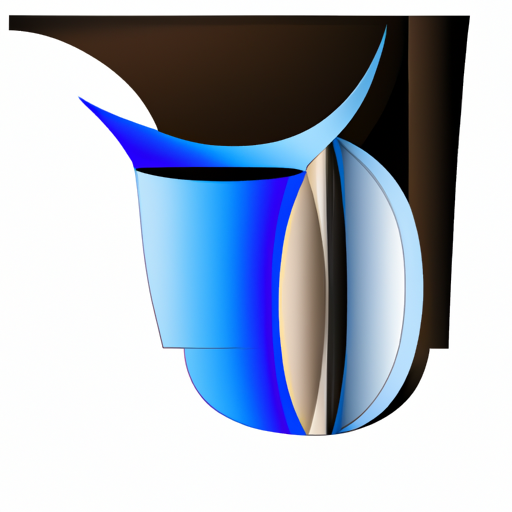


    cylinder cannon mural


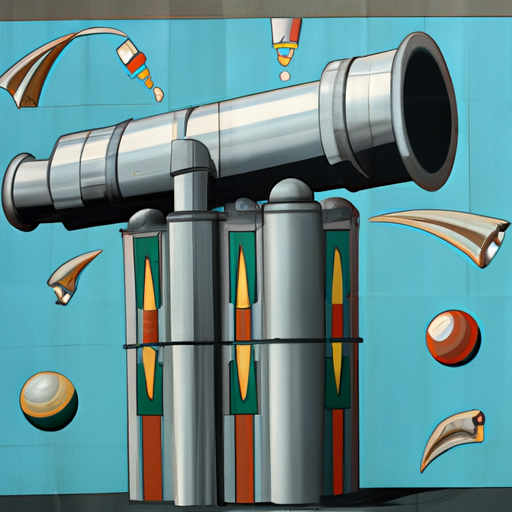


Fleece sonar waterfall


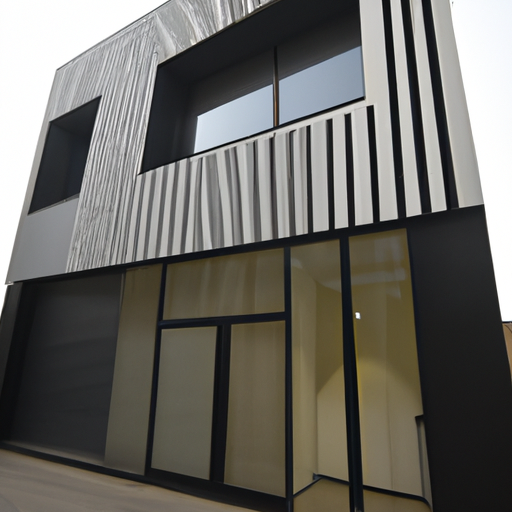


    postulate toy chilly


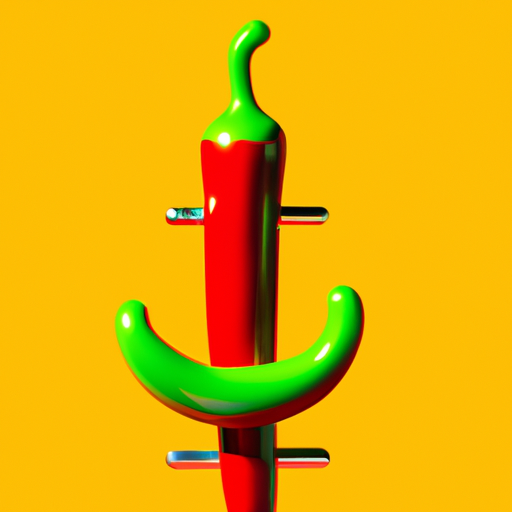


    Barking Oatmeal Subway


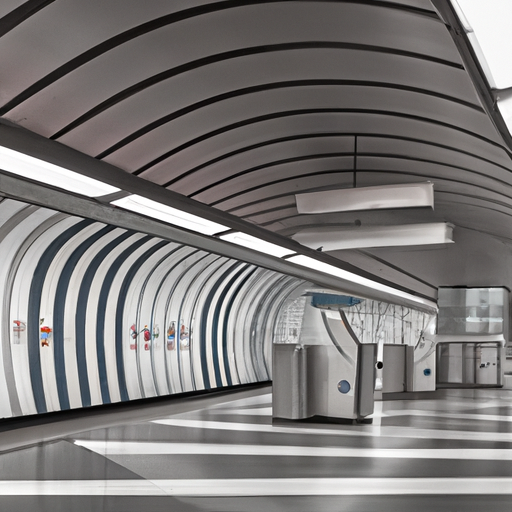


    pendant girth napkin


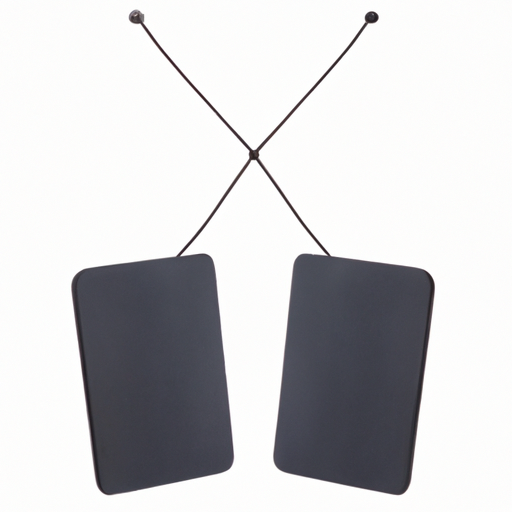


    pillow mantis invader


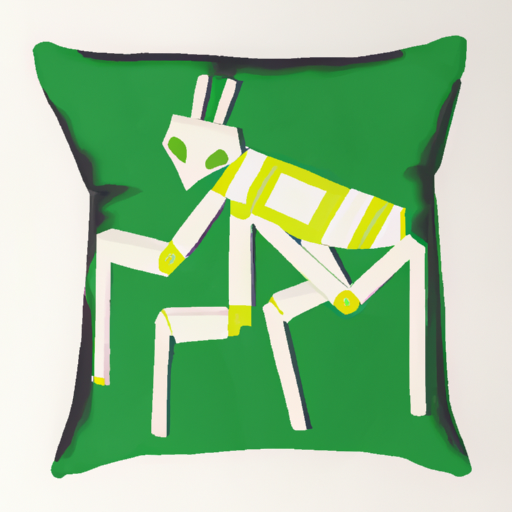


Slothful, parakeet, filigree


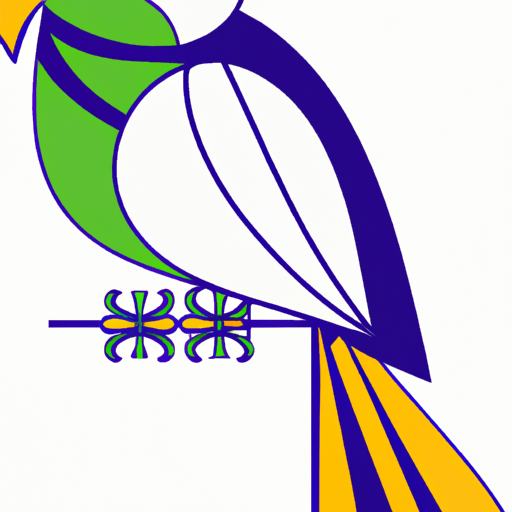

<IPython.core.display.Javascript object>

In [35]:
# MAIN #################################

# Initialize the LLM
llm = OpenAI(temperature=0.9)

i = 1
while (i < 15):
    # LOOP HERE

    # Create the prompt and execute it
    text = f"""
    Return 3 random words separated by spaces without comma delimiters.
    Each word will have no relation to each other.
    """
 
    random_words = llm(text)
    print(random_words)

    random_words += " in bauhaus style"


    url = generate_image(random_words)
    display_image(url)
    
    i += 1